In [ ]:
# 1. 날씨 관측 데이터 읽기 (data-files/seoul-temperature.csv)

with open('data-files/seoul-temperature.csv', 'rt', encoding="utf-8") as f:
    lines = f.readlines() # 파일 전체를 읽어서 행별로 구분한 후 리스트에 담아서 반환

In [2]:
# 2. 읽은 데이터 확인
lines[:10]

['날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)\n',
 '1907-10-01,108,13.5,7.9,20.7\n',
 '1907-10-02,108,16.2,7.9,22\n',
 '1907-10-03,108,16.2,13.1,21.3\n',
 '1907-10-04,108,16.5,11.2,22\n',
 '1907-10-05,108,17.6,10.9,25.4\n',
 '1907-10-06,108,13,11.2,21.3\n',
 '1907-10-07,108,11.3,6.3,16.1\n',
 '1907-10-08,108,8.9,3.9,14.9\n',
 '1907-10-09,108,11.6,3.8,21.1\n']

In [3]:
# "1, 2, 3, 4, 5" -> ['1', '2', '3', '4', '5']
"1, 2, 3, 4, 5".split(',') # ,로 구분해서 리스트로 변환

['1', ' 2', ' 3', ' 4', ' 5']

In [12]:
# 각 행의 데이터를 ,를 기준으로 분리해서 리스트로 변환
rows = [] # 정상 데이터를 저장할 변수
invalid_rows = [] # 비정상 데이터를 저장할 변수
for line in lines[1:]:
    row = line.split(',') # '1907-10-01,108,13.5,7.9,20.7\n' -> ['1907-10-01','108','13.5','7.9','20.7\n']
    try:
        row[2] = float(row[2]) # 문자열 -> 부동소수점 숫자 : '13.5' -> 13.5
        row[3] = float(row[3])
        row[4] = float(row[4].replace('\n', '')) # '12.34\n' -> '12.34' -> 12.34 
        rows.append(row)
    except:
        # print(line, row)
        invalid_rows.append(row)

In [ ]:
# 처리된 데이터 확인
print(len(rows), len(invalid_rows)) # 정상 처리 데이터와 비정상 처리 데이터 갯수 확인
rows[:3] # 데이터 확인

41726 760


[['1907-10-01', '108', 13.5, 7.9, 20.7],
 ['1907-10-02', '108', 16.2, 7.9, 22.0],
 ['1907-10-03', '108', 16.2, 13.1, 21.3]]

In [ ]:
# 데이터 제목 (컬럼) 확인
lines[0]

'날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)\n'

In [17]:
# 최고기온 컬럼에서 가장 큰 값 찾기
max_temp = -1000
for row in rows:
    if max_temp < row[4]: # 최고기온
        max_temp = row[4]

In [18]:
max_temp

39.6

In [19]:
# 최고기온 컬럼에서 가장 큰 값이 포함된 행 찾기
max_temp_row = rows[0]
for row in rows[1:]:
    if max_temp_row[4] < row[4]: # 최고기온
        max_temp_row = row

In [ ]:
print( max_temp )
max_temp_row

['2018-08-01', '108', 33.6, 27.8, 39.6]

In [23]:
# 최저기온 컬럼에서 가장 작은 값이 포함된 행 찾기
min_temp_row = rows[0]
for row in rows[1:]:
    if min_temp_row[3] > row[3]:
        min_temp_row = row

In [24]:
min_temp_row

['1927-12-31', '108', -15.3, -23.1, -6.4]

In [25]:
'1927-12-31'[5:7]

'12'

In [32]:
# 5월 중에 가장 추웠던 날과 가장 더웠던 날 찾기
min_temp_row = None
max_temp_row = None
for row in rows:
    if row[0][5:7] == '05':
        if (min_temp_row == None) or (min_temp_row[3] > row[3]):
            min_temp_row = row
        if (max_temp_row == None) or (max_temp_row[4] < row[4]):
            max_temp_row = row

In [33]:
max_temp_row, min_temp_row

(['1950-05-30', '108', 24.2, 17.1, 34.4],
 ['1917-05-02', '108', 9.5, 2.4, 16.3])

In [ ]:
# 내 생일 중 가장 더웠던 날 / 가장 추웠던 날 찾기
# 내가 태어난 날의 날씨(기온)
# 일교차가 가장 컸던 날 / 가장 작았던 날

In [36]:
# notebook cell에서 !명령어 --> 터미널에서 실행하는 효과
!pip install matplotlib

     ---------------------------------------- 0.0/106.6 kB ? eta -:--:--
     ----------------------------- --------- 81.9/106.6 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 106.6/106.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
    --------------------------------------- 0.2/8.1 MB 5.1 MB/s eta 0:00:02
   - -------------------------------------- 0.3/8.1 MB 4.0 MB/s eta 0:00:02
   - -------------------------------------- 0.4/8.1 MB 3.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 2.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/8.1 MB 2.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.1 MB 2.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 2.5 MB/s eta 0:00:03
   ---- ------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


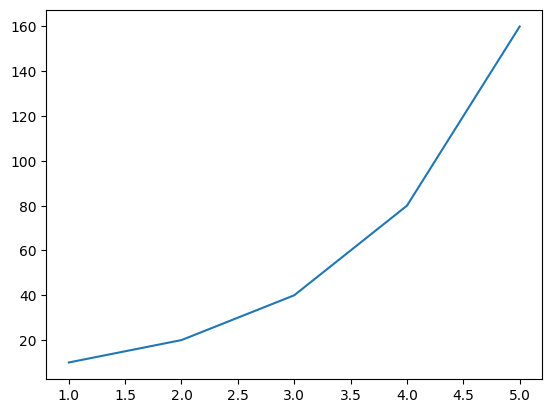

In [ ]:
# 선 그래프 그리기
import matplotlib.pyplot as plt

# plt.plot([10, 20, 40, 80, 160]) # y축의 값 (x축은 자동으로 결정)
plt.plot([1, 2, 3, 4, 5], [10, 20, 40, 80, 160]) # x축, y축 값
plt.show()

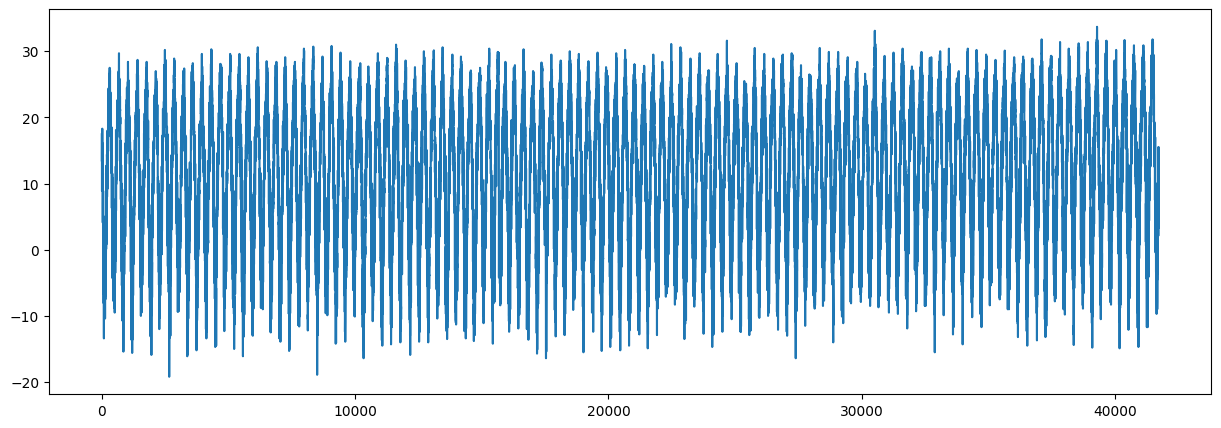

In [42]:
# 전체 평균 기온 데이터를 뽑아서 선 그래프 그리기
all_avg_temp = []
for row in rows:
    all_avg_temp.append(row[2])

plt.figure(figsize=(15, 5)) # 그래프 표시 영역의 크기 15x5로 변경
plt.plot(all_avg_temp)
plt.show()

In [43]:
rows[0][0]

'1907-10-01'

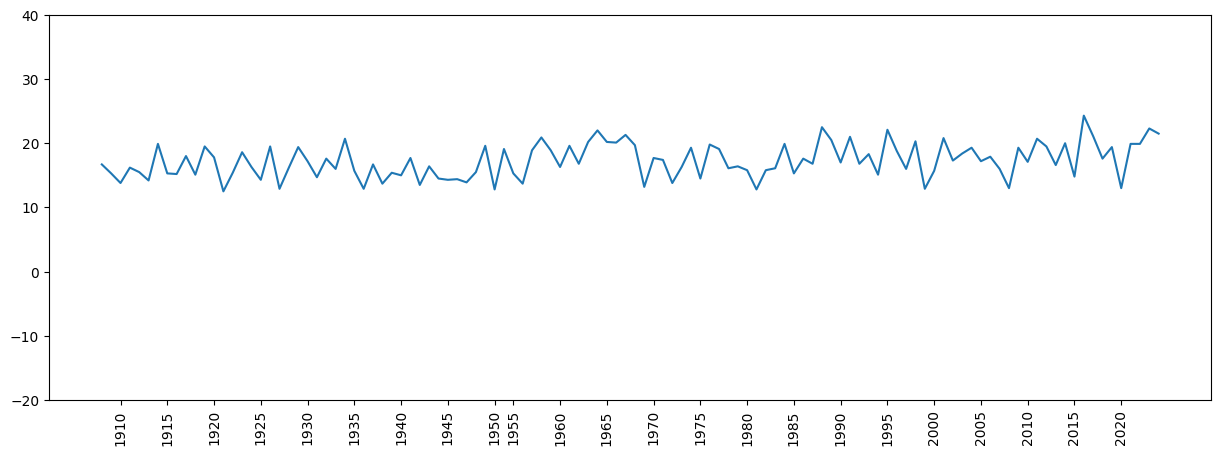

In [48]:
# 매년 5월 19일의 평균 기온 데이터를 뽑아서 선 그래프 그리기
all_avg_temp = []
all_years = []
for row in rows:
    if row[0][-5:] == '05-19':
        all_avg_temp.append(row[2])
        all_years.append(row[0][:4])

xticks = [ y for y in all_years if int(y) % 5 == 0 ]

plt.figure(figsize=(15, 5)) # 그래프 표시 영역의 크기 15x5로 변경
plt.plot(all_years, all_avg_temp)
plt.ylim(-20, 40)
plt.xticks(xticks, rotation=90)
plt.show()